In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import time
import numpy as np

# Data Cleaning

In [2]:
df = pd.read_csv("Ambition_box_Top_Companies_Data.csv")

In [3]:
display(df)

,Name,Sector,Employee count,Company Age(in years),Reviews Count,Highly Rated for,Critically Rated for,Overall Company Rating,Job Security Rating,Work-Life balance Rating,Company culture Rating,Skill development Rating,Work Satisfaction Rating,Salary & Benefits Rating,Promotions/Appraisal Rating
0,TCS,IT Services & Consulting,1 Lakh+ Employees,56,79300.0,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits, Wor...",3.8,4.6,3.8,3.7,3.6,3.4,2.9,2.8
1,Accenture,IT Services & Consulting,1 Lakh+ Employees,35,49400.0,"Company Culture, Job Security, Skill Developme...",Promotions / Appraisal,4.0,3.9,3.7,3.9,3.9,3.6,3.6,3.3
2,Cognizant,IT Services & Consulting,1 Lakh+ Employees,30,44700.0,NaN,Promotions / Appraisal,3.9,3.7,3.7,3.7,3.7,3.5,3.5,3.2
3,Wipro,IT Services & Consulting,1 Lakh+ Employees,79,42500.0,Job Security,"Promotions / Appraisal, Salary & Benefits",3.8,3.9,3.7,3.7,3.7,3.5,3.2,3.0
4,Capgemini,IT Services & Consulting,1 Lakh+ Employees,57,36600.0,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits",3.8,3.9,3.8,3.8,3.8,3.5,3.1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Team Computers,IT Services & Consulting,1k-5k Employees,37,1300.0,NaN,Promotions / Appraisal,3.7,3.5,3.6,3.5,3.5,3.4,3.4,3.1
496,Innovsource Services,Recruitment,1k-5k Employees,20,1300.0,NaN,Promotions / Appraisal,4.0,3.6,3.7,3.7,3.7,3.7,3.6,3.2
497,Chegg,EdTech,501-1k Employees,19,1300.0,"Work Life Balance, Skill Development / Learnin...",Promotions / Appraisal,4.2,3.5,4.3,4.0,4.1,3.9,3.9,3.4
498,CMS Infosystems,IT Services & Consulting,5k-10k Employees,16,1300.0,NaN,"Promotions / Appraisal, Salary & Benefits, Com...",3.7,3.4,3.2,3.2,3.3,3.2,3.1,2.8


In [6]:
df.rename(columns = {"Company Age(in years)":"Company Age"} , inplace=True)

In [7]:
df["Company Age"] = df["Company Age"].str.replace("years old" , "")
df.rename(columns={'Company Age': 'Company Age(in years)'}, inplace=True)

In [12]:
display(df)

,Name,Sector,Employee count,Company Age(in years),Reviews Count,Highly Rated for,Critically Rated for,Overall Company Rating,Job Security Rating,Work-Life balance Rating,Company culture Rating,Skill development Rating,Work Satisfaction Rating,Salary & Benefits Rating,Promotions/Appraisal Rating
0,TCS,IT Services & Consulting,1 Lakh+ Employees,56,79300.0,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits, Wor...",3.8,4.6,3.8,3.7,3.6,3.4,2.9,2.8
1,Accenture,IT Services & Consulting,1 Lakh+ Employees,35,49400.0,"Company Culture, Job Security, Skill Developme...",Promotions / Appraisal,4.0,3.9,3.7,3.9,3.9,3.6,3.6,3.3
2,Cognizant,IT Services & Consulting,1 Lakh+ Employees,30,44700.0,NaN,Promotions / Appraisal,3.9,3.7,3.7,3.7,3.7,3.5,3.5,3.2
3,Wipro,IT Services & Consulting,1 Lakh+ Employees,79,42500.0,Job Security,"Promotions / Appraisal, Salary & Benefits",3.8,3.9,3.7,3.7,3.7,3.5,3.2,3.0
4,Capgemini,IT Services & Consulting,1 Lakh+ Employees,57,36600.0,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits",3.8,3.9,3.8,3.8,3.8,3.5,3.1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Team Computers,IT Services & Consulting,1k-5k Employees,37,1300.0,NaN,Promotions / Appraisal,3.7,3.5,3.6,3.5,3.5,3.4,3.4,3.1
496,Innovsource Services,Recruitment,1k-5k Employees,20,1300.0,NaN,Promotions / Appraisal,4.0,3.6,3.7,3.7,3.7,3.7,3.6,3.2
497,Chegg,EdTech,501-1k Employees,19,1300.0,"Work Life Balance, Skill Development / Learnin...",Promotions / Appraisal,4.2,3.5,4.3,4.0,4.1,3.9,3.9,3.4
498,CMS Infosystems,IT Services & Consulting,5k-10k Employees,16,1300.0,NaN,"Promotions / Appraisal, Salary & Benefits, Com...",3.7,3.4,3.2,3.2,3.3,3.2,3.1,2.8


In [13]:
df["Employee count"].fillna(df["Employee count"].mode()[0] , inplace=True)	

C:\Users\naage\AppData\Local\Temp\ipykernel_17284\1812232289.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Employee count"].fillna(df["Employee count"].mode()[0] , inplace=True)


In [14]:
display(df)

,Name,Sector,Employee count,Company Age(in years),Reviews Count,Highly Rated for,Critically Rated for,Overall Company Rating,Job Security Rating,Work-Life balance Rating,Company culture Rating,Skill development Rating,Work Satisfaction Rating,Salary & Benefits Rating,Promotions/Appraisal Rating
0,TCS,IT Services & Consulting,1 Lakh+ Employees,56,79300.0,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits, Wor...",3.8,4.6,3.8,3.7,3.6,3.4,2.9,2.8
1,Accenture,IT Services & Consulting,1 Lakh+ Employees,35,49400.0,"Company Culture, Job Security, Skill Developme...",Promotions / Appraisal,4.0,3.9,3.7,3.9,3.9,3.6,3.6,3.3
2,Cognizant,IT Services & Consulting,1 Lakh+ Employees,30,44700.0,NaN,Promotions / Appraisal,3.9,3.7,3.7,3.7,3.7,3.5,3.5,3.2
3,Wipro,IT Services & Consulting,1 Lakh+ Employees,79,42500.0,Job Security,"Promotions / Appraisal, Salary & Benefits",3.8,3.9,3.7,3.7,3.7,3.5,3.2,3.0
4,Capgemini,IT Services & Consulting,1 Lakh+ Employees,57,36600.0,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits",3.8,3.9,3.8,3.8,3.8,3.5,3.1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Team Computers,IT Services & Consulting,1k-5k Employees,37,1300.0,NaN,Promotions / Appraisal,3.7,3.5,3.6,3.5,3.5,3.4,3.4,3.1
496,Innovsource Services,Recruitment,1k-5k Employees,20,1300.0,NaN,Promotions / Appraisal,4.0,3.6,3.7,3.7,3.7,3.7,3.6,3.2
497,Chegg,EdTech,501-1k Employees,19,1300.0,"Work Life Balance, Skill Development / Learnin...",Promotions / Appraisal,4.2,3.5,4.3,4.0,4.1,3.9,3.9,3.4
498,CMS Infosystems,IT Services & Consulting,5k-10k Employees,16,1300.0,NaN,"Promotions / Appraisal, Salary & Benefits, Com...",3.7,3.4,3.2,3.2,3.3,3.2,3.1,2.8


In [18]:
df.to_csv('Ambition_box_Top_Companies_Data.csv',index=False, header=True)

# Data Analysis

In [21]:
import matplotlib.pyplot as plt

In [22]:
#This code will provide summary statistics for the numerical columns.
numeric_columns = [
    'Company Age(in years)', 'Reviews Count', 'Overall Company Rating',
    'Job Security Rating', 'Work-Life balance Rating', 'Company culture Rating',
    'Skill development Rating', 'Work Satisfaction Rating', 'Salary & Benefits Rating',
    'Promotions/Appraisal Rating'
]

# Convert columns to numeric
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Generate descriptive statistics
descriptive_stats = df[numeric_columns].describe()
descriptive_stats

,Company Age(in years),Reviews Count,Overall Company Rating,Job Security Rating,Work-Life balance Rating,Company culture Rating,Skill development Rating,Work Satisfaction Rating,Salary & Benefits Rating,Promotions/Appraisal Rating
count,490.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,48.600000,4192.000000,3.950400,3.813600,3.749200,3.753600,3.771200,3.630200,3.634800,3.344200
std,46.139949,6707.825717,0.268559,0.364473,0.314798,0.318827,0.277786,0.292436,0.331676,0.321735
min,2.000000,1300.000000,3.000000,2.200000,2.200000,2.700000,2.900000,2.700000,2.500000,2.400000
25%,20.000000,1700.000000,3.800000,3.600000,3.600000,3.600000,3.600000,3.500000,3.475000,3.200000
50%,31.500000,2300.000000,4.000000,3.800000,3.800000,3.800000,3.800000,3.700000,3.700000,3.350000
75%,61.500000,3700.000000,4.100000,4.100000,3.900000,4.000000,3.900000,3.800000,3.800000,3.500000
max,359.000000,79300.000000,4.800000,4.700000,4.800000,4.800000,4.800000,4.800000,4.700000,4.600000


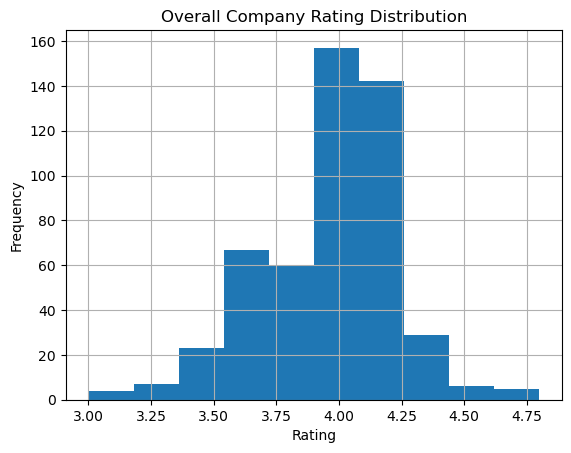

In [23]:
# Create histogram
df['Overall Company Rating'].hist(bins=10)
plt.title('Overall Company Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

##### Observations of Univariate Analysis

##### Top 500 companies avergae age is 48 years
##### Top 500 companies average rating is 3.95
##### there are 100+ companies whose overal rating is 4+

In [24]:
# Correlation matrix
correlation_matrix = df[numeric_columns].corr()
correlation_matrix

,Company Age(in years),Reviews Count,Overall Company Rating,Job Security Rating,Work-Life balance Rating,Company culture Rating,Skill development Rating,Work Satisfaction Rating,Salary & Benefits Rating,Promotions/Appraisal Rating
Company Age(in years),1.000000,-0.023715,0.183767,0.231435,0.168042,0.188159,0.114292,0.138071,0.115451,0.060322
Reviews Count,-0.023715,1.000000,-0.055776,0.103539,-0.026320,-0.008073,0.004909,-0.058425,-0.140860,-0.090159
Overall Company Rating,0.183767,-0.055776,1.000000,0.760947,0.854308,0.916515,0.915904,0.956347,0.782776,0.844144
Job Security Rating,0.231435,0.103539,0.760947,1.000000,0.705387,0.748211,0.703183,0.728286,0.419964,0.579504
Work-Life balance Rating,0.168042,-0.026320,0.854308,0.705387,1.000000,0.912522,0.758977,0.887890,0.578759,0.665276
Company culture Rating,0.188159,-0.008073,0.916515,0.748211,0.912522,1.000000,0.866898,0.926183,0.686922,0.757927
Skill development Rating,0.114292,0.004909,0.915904,0.703183,0.758977,0.866898,1.000000,0.922755,0.738900,0.843918
Work Satisfaction Rating,0.138071,-0.058425,0.956347,0.728286,0.887890,0.926183,0.922755,1.000000,0.746373,0.849480
Salary & Benefits Rating,0.115451,-0.140860,0.782776,0.419964,0.578759,0.686922,0.738900,0.746373,1.000000,0.885289
Promotions/Appraisal Rating,0.060322,-0.090159,0.844144,0.579504,0.665276,0.757927,0.843918,0.849480,0.885289,1.000000


In [25]:
# Top 5 companies by overall rating
top_companies_work_life = df[['Name', 'Work-Life balance Rating']].sort_values(by='Work-Life balance Rating', ascending=False).head(5)

# Bottom 5 companies by overall rating
bottom_companies_work_life = df[['Name', 'Work-Life balance Rating']].sort_values(by='Work-Life balance Rating', ascending=True).head(5)

display(top_companies_work_life, bottom_companies_work_life)

,Name,Work-Life balance Rating
148,Marpu Foundation,4.8
19,iEnergizer,4.7
168,Kogta Financial India Limited,4.7
414,Kalyan Jewellers,4.6
234,Sahrudaya Healthcare (Medicover Hospitals),4.5


,Name,Work-Life balance Rating
329,ZS,2.2
22,BYJU'S,2.6
364,Unacademy,2.8
402,IntouchCX,2.8
206,PolicyBazaar,2.9


In [26]:
# Top 5 companies by overall rating
top_companies_overall = df[['Name', 'Overall Company Rating']].sort_values(by='Overall Company Rating', ascending=False).head(5)

# Bottom 5 companies by overall rating
bottom_companies_overall = df[['Name', 'Overall Company Rating']].sort_values(by='Overall Company Rating', ascending=True).head(5)

display(top_companies_overall, bottom_companies_overall)

,Name,Overall Company Rating
168,Kogta Financial India Limited,4.8
148,Marpu Foundation,4.8
77,Indian Army,4.7
414,Kalyan Jewellers,4.7
19,iEnergizer,4.7


,Name,Overall Company Rating
402,IntouchCX,3.0
364,Unacademy,3.1
22,BYJU'S,3.1
242,CMS IT Services,3.1
351,NoBroker,3.2


In [27]:
# Top 5 companies by overall rating
top_companies_job_security = df[['Name', 'Job Security Rating']].sort_values(by='Job Security Rating', ascending=False).head(5)

# Bottom 5 companies by overall rating
bottom_companies_job_security = df[['Name', 'Job Security Rating']].sort_values(by='Job Security Rating', ascending=True).head(5)

display(top_companies_job_security, bottom_companies_job_security)

,Name,Job Security Rating
148,Marpu Foundation,4.7
77,Indian Army,4.7
209,Indian Air Force,4.7
205,Bank of America,4.7
19,iEnergizer,4.7


,Name,Job Security Rating
364,Unacademy,2.2
22,BYJU'S,2.3
473,Vedantu,2.5
142,Oyo Rooms,2.6
181,Whitehat jr,2.6


### Observations

##### Top and Bottom companies based on Overall Rating :- Kogta Financial India Limited and IntouchCX
##### Top and Bottom companies based on Job Security Rating :- Marpu Foundation and Unacademy
##### Top and Bottom companies based on Work-Life balance Rating :- Kogta Financial India Limited and ZS	

Employee count
10k-50k Employees              183
1k-5k Employees                116
1 Lakh+ Employees               30
1 Lakh+ Employees (Global)       1
10k-50k Employees (Global)       1
Name: Name, dtype: int64

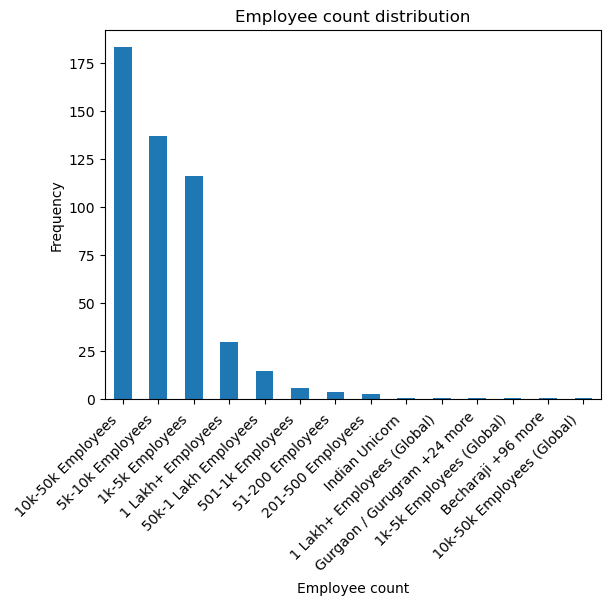

In [28]:
display(df.groupby("Employee count")["Name"].count().head(5).sort_values(ascending=False))

# Frequency Distribution
frequency = df['Employee count'].value_counts()

# Bar Chart
frequency.plot(kind='bar')
plt.title('Employee count distribution')
plt.xlabel('Employee count')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [29]:
display(df.groupby('Sector')["Sector"].count().sort_values(ascending=False).head(5))

Sector
IT Services & Consulting     72
Pharma                       30
Banking                      27
Insurance                    25
Internet                     23
Name: Sector, dtype: int64

### Observations

##### From the top 500 companies 183 companies have employees count in between 10-50k
##### From the top 500 companies IT Services & Consulting have highest sector with 72

In [30]:
#This code will calculate average ratings for each sector.
sector_analysis = df.groupby('Sector')[numeric_columns].mean().sort_values(by='Overall Company Rating', ascending=False)
sector_analysis

,Company Age(in years),Reviews Count,Overall Company Rating,Job Security Rating,Work-Life balance Rating,Company culture Rating,Skill development Rating,Work Satisfaction Rating,Salary & Benefits Rating,Promotions/Appraisal Rating
Sector,,,,,,,,,,
Jewellery,31.000000,1600.000000,4.700000,4.600000,4.600000,4.600000,4.600000,4.600000,4.600000,4.500000
Pune +30 more,NaN,1400.000000,4.600000,4.200000,4.400000,4.500000,4.600000,4.500000,4.100000,4.200000
Defence & Aerospace,80.500000,2625.000000,4.375000,4.425000,4.125000,4.125000,4.225000,4.100000,4.025000,3.700000
Fortune India 500,NaN,1800.000000,4.300000,4.300000,3.900000,4.100000,4.000000,4.000000,4.100000,3.900000
Non-Profit,13.500000,2450.000000,4.250000,3.950000,4.100000,4.050000,4.150000,4.100000,3.900000,3.850000
...,...,...,...,...,...,...,...,...,...,...
Management Consulting,84.600000,7940.000000,3.620000,3.720000,3.000000,3.480000,3.640000,3.220000,3.560000,3.260000
Aviation,19.000000,2400.000000,3.600000,3.600000,3.300000,3.400000,3.600000,3.200000,3.200000,3.100000
Accounting & Auditing,22.000000,3000.000000,3.600000,3.900000,3.300000,3.500000,3.700000,3.300000,3.500000,3.200000


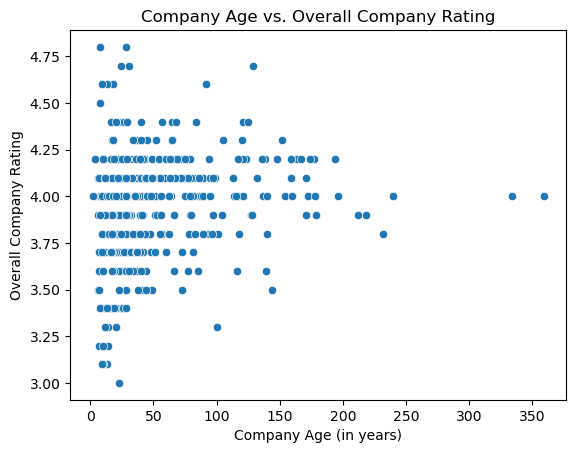

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of company age vs overall rating
sns.scatterplot(x=df['Company Age(in years)'], y=df['Overall Company Rating'])
plt.title('Company Age vs. Overall Company Rating')
plt.xlabel('Company Age (in years)')
plt.ylabel('Overall Company Rating')
plt.show()

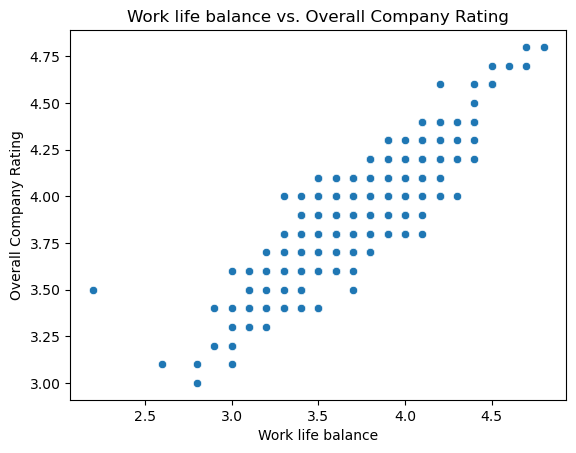

In [32]:
# Scatter plot of company age vs overall rating
sns.scatterplot(x=df['Work-Life balance Rating'], y=df['Overall Company Rating'])
plt.title('Work life balance vs. Overall Company Rating')
plt.xlabel('Work life balance')
plt.ylabel('Overall Company Rating')
plt.show()

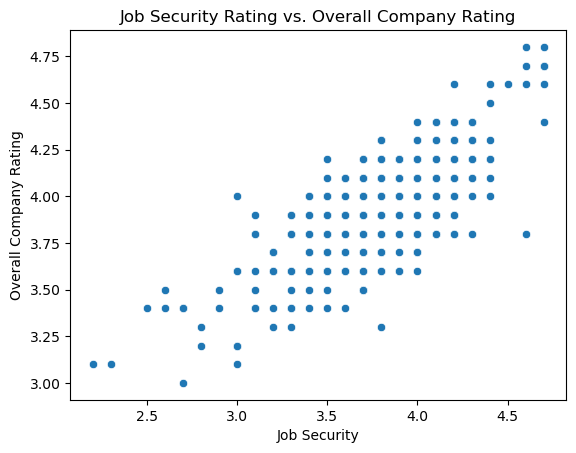

In [33]:
sns.scatterplot(x=df['Job Security Rating'], y=df['Overall Company Rating'])
plt.title('Job Security Rating vs. Overall Company Rating')
plt.xlabel('Job Security')
plt.ylabel('Overall Company Rating')
plt.show()

### Observations

##### Companies with rating above 4 are in range 0 - 100 years old
##### Overall Company rating and Work life balance rating are proportional to each other
##### Overall Company rating and Job Security rating are proportional to each other